<a href="https://colab.research.google.com/github/AbhishekBangde/Yulu-Hypothesis-Testing-Market-Research-Analysis/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yulu - Hypothesis Testing**

## **About Yulu**


Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily
commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest
commute solution through a user-friendly mobile app to enable shared, solo and sustainable
commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office
spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!

## **Data Description**

• **datetime**: datetime

• **season**: season (1: spring, 2: summer, 3: fall, 4: winter)

• **holiday**: whether day is a holiday or not

• **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

• **weather**:

1. Clear, Few clouds, partly cloudy, partly cloudy

2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds

4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

• **temp**: temperature in Celsius

• **atemp**: feeling temperature in Celsius

• **humidity**: humidity

• **windspeed**: wind speed

• **casual**: count of casual users

• **registered**: count of registered users

• **count**: count of total rental bikes including both casual and registered

### **Lets start importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from scipy.stats import shapiro, levene

### **Now lets download the dataset and name it as 'df'**

In [ ]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089'

In [ ]:
df = pd.read_csv(url)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### **Lets take a look at the shape of dataset, looking the number of rows and columns.**

In [ ]:
df.shape

(10886, 12)

### **We see there are 10886 rows and 12 columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### **Lets convert the seasons from integer to string by defining respectable name to them**

In [ ]:
def vector(a):
  if a==1:
    return 'spring'
  elif a==2:
    return 'summer'
  elif a==3:
    return 'fall'
  else:
    return 'winter'

new_vector = np.vectorize(vector)
df['season'] = new_vector(df['season'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129


### **Now lets convert the datetime columns from string datetime format**

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(1)
memory usage: 1020.7+ KB


### **Lets look for the duplicate and missing values in the dataset**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


### **Since there are no duplicates and null values there in the dataset, so no need of treatment.**

# **Univariate Analysis**

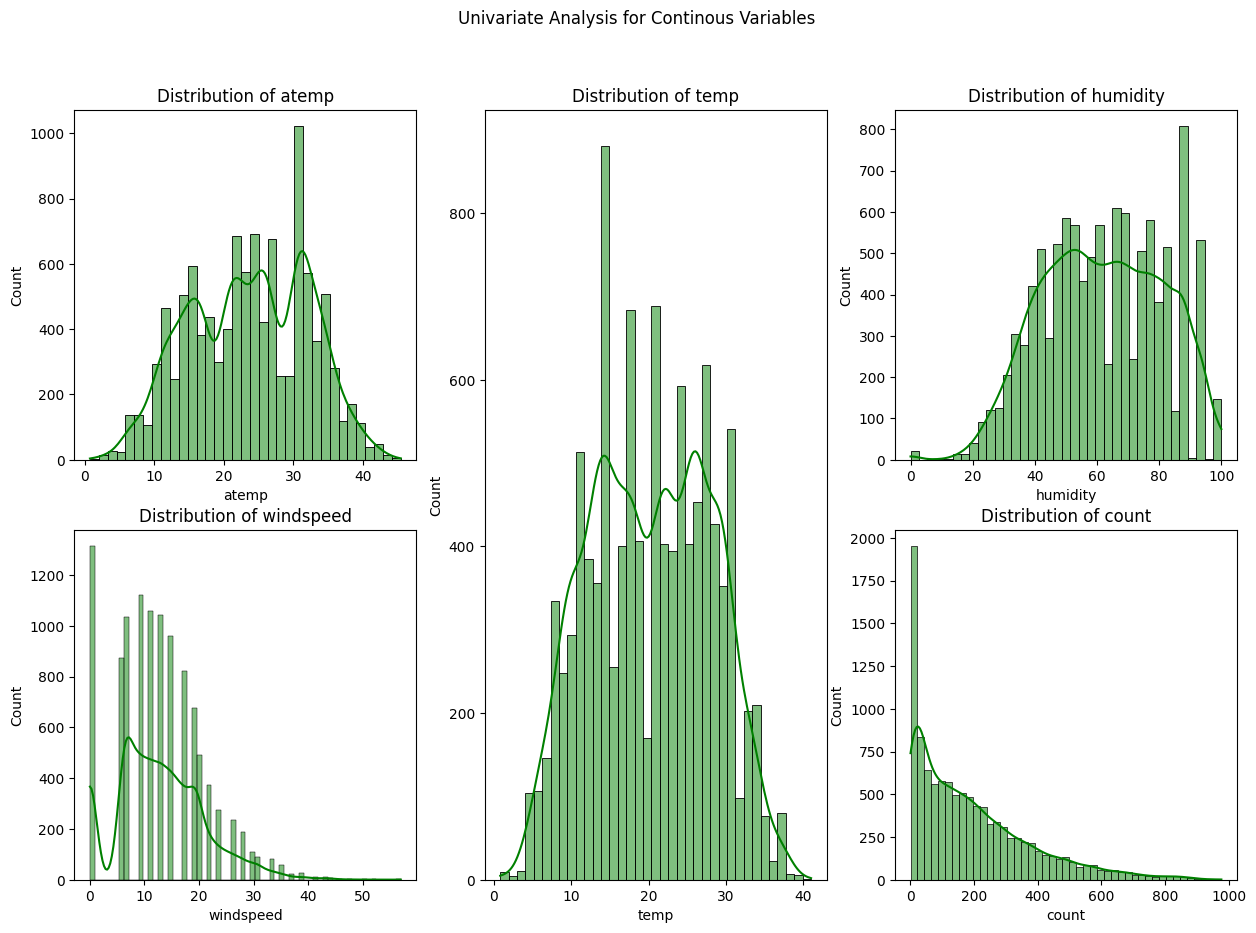

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(1,3,2)
sns.histplot(df['temp'], kde=True, color='green')
plt.title('Distribution of temp')

plt.subplot(2,3,1)
sns.histplot(df['atemp'], kde=True, color='green')
plt.title('Distribution of atemp')

plt.subplot(2,3,3)
sns.histplot(df['humidity'], kde=True, color='green')
plt.title('Distribution of humidity')

plt.subplot(2,3,4)
sns.histplot(df['windspeed'], kde=True, color='green')
plt.title('Distribution of windspeed')

plt.subplot(2,3,6)
sns.histplot(df['count'], kde=True, color='green')
plt.title('Distribution of count')

plt.suptitle('Univariate Analysis for Continous Variables')
plt.show()

## **Comments for above plot**

**1. Distribution of atemp (Adjusted Temperature):**

   - The adjusted temperature (atemp) distribution appears approximately normal with a peak around 30°C.
   - Most values range between 10°C and 40°C, indicating moderate to warm temperatures dominate.

**2. Distribution of temp (Temperature):**

   - The temperature distribution closely resembles atemp, peaking around 25°C.
   - The values are mostly concentrated in the range of 10°C to 35°C, showing a similar moderate to warm climate pattern.

**3. Distribution of humidity:**

   - The humidity distribution is skewed slightly to the right, with a peak around 60%-80%.
   - A significant number of observations are in the high humidity range, indicating humid conditions are common.

**4. Distribution of windspeed:**

   - The windspeed distribution is highly right-skewed, with most observations clustered around low wind speeds (0-10).
   - A small number of instances show higher wind speeds, but they are relatively rare.

**5. Distribution of count (Bike Rentals):**

   - The bike rental count distribution is heavily right-skewed, with most values concentrated in the lower range (0-200 rentals).
   - A gradual decline is observed as the rental count increases, indicating a few instances of very high demand.

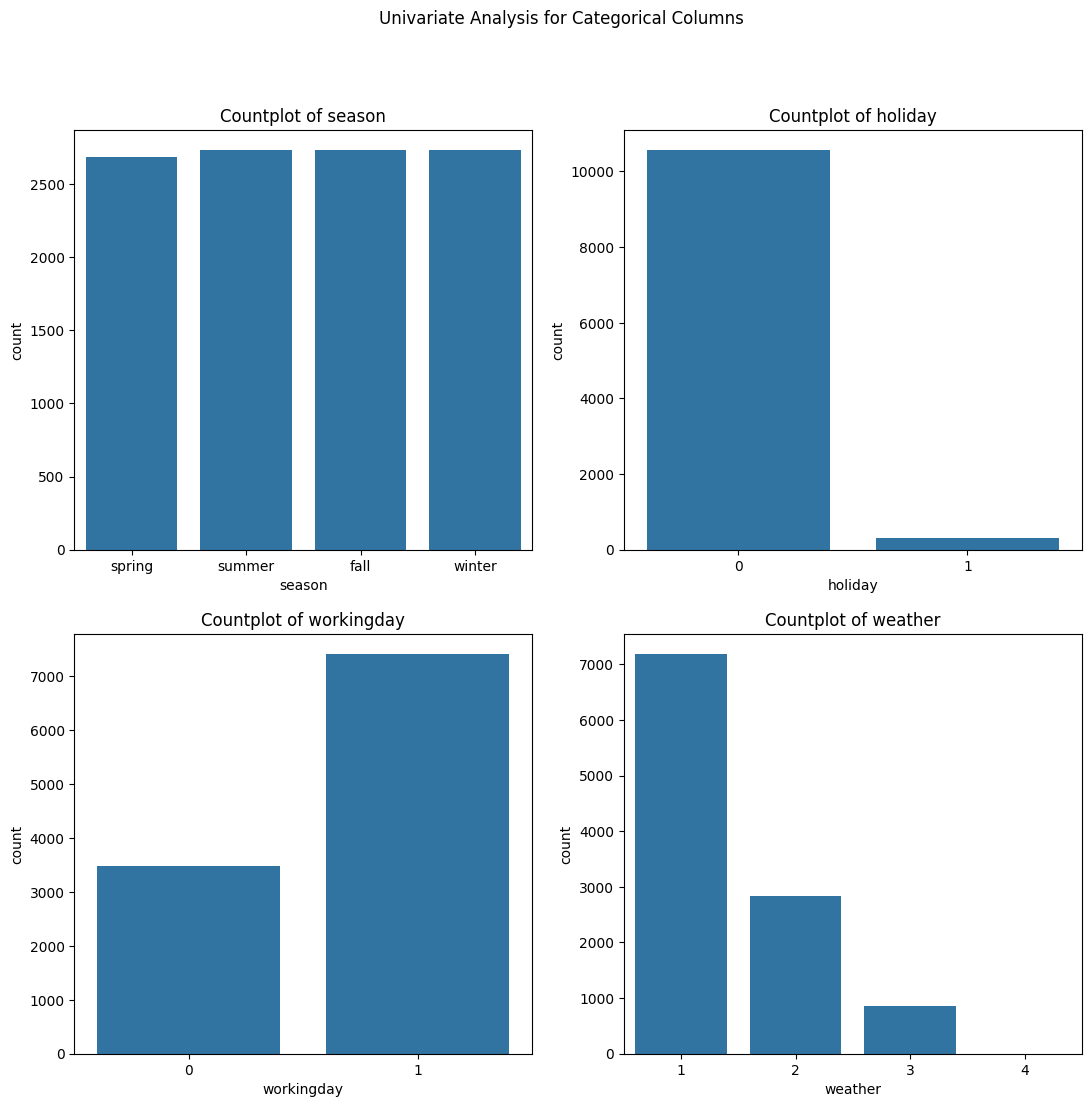

In [ ]:
plt.figure(figsize=(13, 12))

plt.subplot(2,2,1)
sns.countplot(x='season', data=df)
plt.title('Countplot of season')

plt.subplot(2,2,2)
sns.countplot(x='holiday', data=df)
plt.title('Countplot of holiday')

plt.subplot(2,2,3)
sns.countplot(x='workingday', data=df)
plt.title('Countplot of workingday')

plt.subplot(2,2,4)
sns.countplot(x='weather', data=df)
plt.title('Countplot of weather')

plt.suptitle('Univariate Analysis for Categorical Columns')
plt.show()

## **Comments for above plot**

1. Countplot of season:
   - The distribution of seasons is approximately equal, with a similar count of observations across all four seasons (spring, summer, fall, and winter).
   - This suggests that data collection was well-balanced throughout the year.

2. Countplot of holiday:
   - Most observations are from non-holiday days (0), with a significantly smaller count of holidays (1).
   - This indicates that holidays are less frequent in the dataset compared to regular days.

3. Countplot of workingday:
   - A higher number of observations corresponds to working days (1) compared to non-working days (0).
   - This highlights that the dataset primarily captures activity during working days.

4. Countplot of weather:
   - The majority of observations fall under weather condition 1 (likely clear or partly cloudy), followed by weather condition 2 (e.g., mist or light rain).
   - Weather condition 3 (e.g., heavy rain or snow) has fewer observations, and weather condition 4 (extreme weather) has negligible or no entries.


# **Bivariate Analysis**

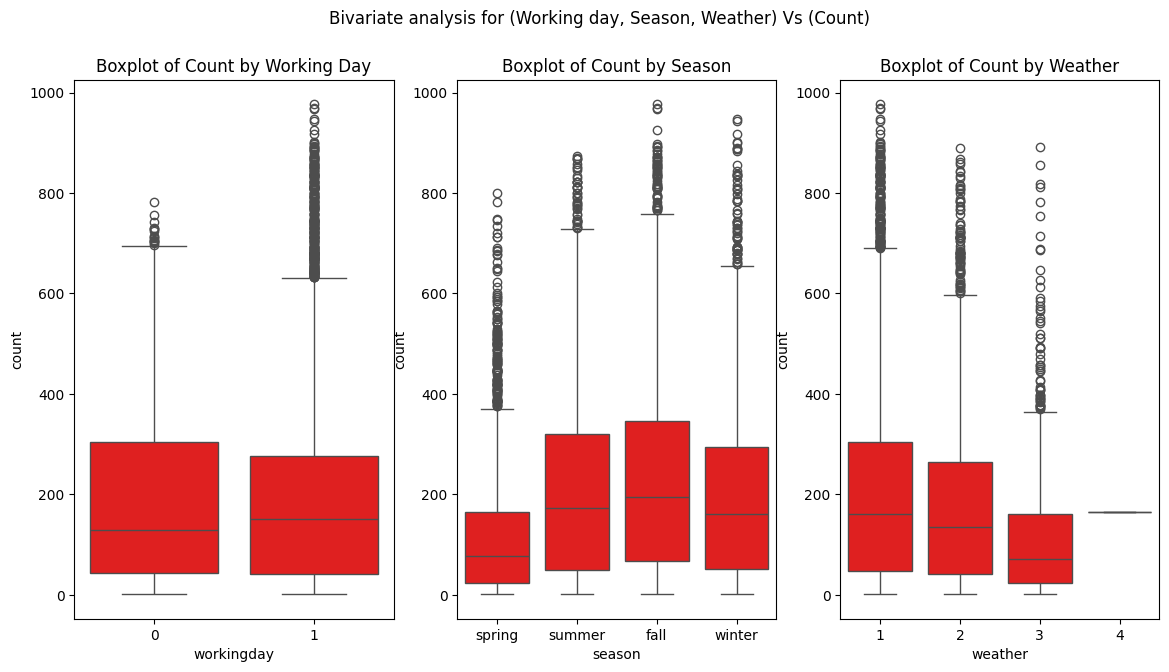

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1,3,1)
sns.boxplot(x='workingday', y='count', data=df, color='red')
plt.title("Boxplot of Count by Working Day")

plt.subplot(1,3,2)
sns.boxplot(x='season', y='count', data=df, color='red')
plt.title("Boxplot of Count by Season")

plt.subplot(1,3,3)
sns.boxplot(x='weather', y='count', data=df, color='red')
plt.title("Boxplot of Count by Weather")

plt.suptitle('Bivariate analysis for (Working day, Season, Weather) Vs (Count)')
plt.show()

## **Comments for above plot**

1. **Boxplot of Count by Working Day:**
   - The count on working days (1) shows a higher median compared to non-working days (0).
   - There is a greater variability in counts on working days, indicated by the longer whiskers.
   - Outliers are present in both working and non-working days, but more outliers are seen on working days.

2. **Boxplot of Count by Season:**
   - The median count is highest in fall and lowest in spring.
   - Summer and winter show similar median counts, higher than spring but lower than fall.
   - Fall has the widest interquartile range (IQR), indicating higher variability.
   - Numerous outliers are present in all seasons, especially in fall.

3. **Boxplot of Count by Weather:**
   - The median count is highest for weather condition 1 (likely clear or partly cloudy) and decreases for conditions 2 and 3.
   - Weather condition 4 shows a very low and consistent count.
   - Weather condition 1 has the widest IQR, indicating more variability in counts.
   - Outliers are present for weather conditions 1, 2, and 3, with condition 1 having the most.

# **Hypothesis Testing**

## **1. Check if Working Day has an effect on the number of electric cycles rented.**

### **Ho** : Working day has no effect on the number of electric cycles rented.
### **Ha** : Working day has significant effect on the number of electric cycles rented.
### Setting confidence level = 95 percent
### therefore alpha  = 0.05

In [ ]:
weekdays = df[df['workingday'] == 1]['count']
weekends = df[df['workingday'] == 0]['count']

alpha = 0.05

t_stat, p_value = ttest_ind(weekdays,weekends,alternative='two-sided')
print("t_stat :",t_stat)
print("p_value :",p_value)

if p_value < alpha:
  print("Reject the null hypothesis")
  print("Working day has significant effect on the number of electric cycles rented")
else:
  print("Fail to reject the null hypothesis")
  print("Working day has no effect on the number of electric cycles rented")

t_stat : 1.2096277376026694
p_value : 0.22644804226361348
Fail to reject the null hypothesis
Working day has no effect on the number of electric cycles rented


### Since p_value > alpha , therefore we conclude Working day has no effect on the number of electric cycles rented.

## **2. Check if the demand of bicycles on rent is the same for different Weather conditions?**

In [ ]:
w1 = df[df['weather']==1]['count']
w2 = df[df['weather']==2]['count']
w3 = df[df['weather']==3]['count']
w4 = df[df['weather']==4]['count']

### Checking whether The rented bikes for every weather follow Annova assumptions Annova Assumption

### 1.Data should be gaussian - Q-Q plot

### 2.Independence

### 3.Equal variance in different groups - levene test

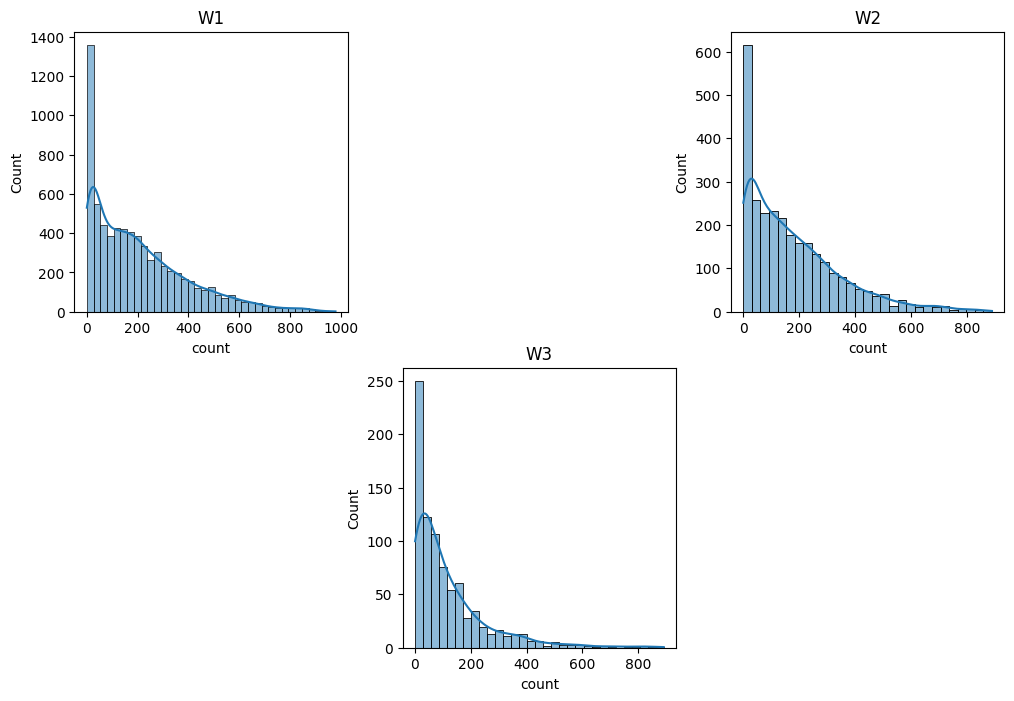

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(231)
sns.histplot(w1,kde=True)
plt.title("W1")
plt.subplot(233)
sns.histplot(w2,kde=True)
plt.title("W2")
plt.subplot(235)
sns.histplot(w3,kde=True)
plt.title("W3")
plt.show()

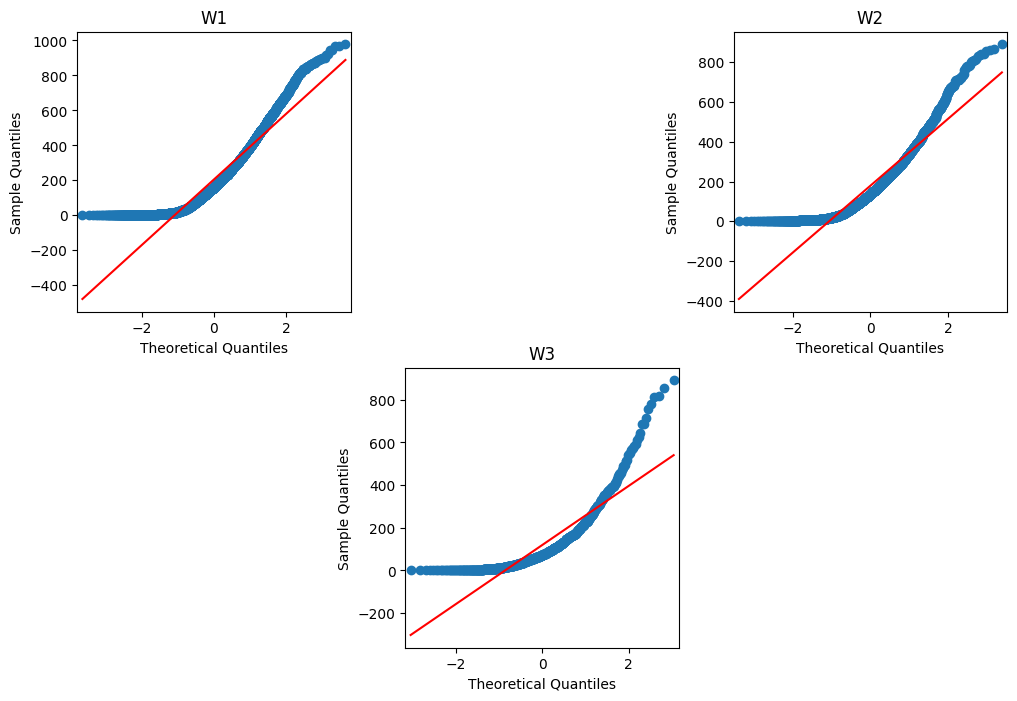

In [ ]:
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
qqplot(w1, line='s', ax=plt.gca())
plt.title("W1")

plt.subplot(2, 3, 3)
qqplot(w2, line='s', ax=plt.gca())
plt.title("W2")

plt.subplot(2, 3, 5)
qqplot(w3, line='s', ax=plt.gca())
plt.title("W3")


plt.show()


## Checking Variance are equal for satisfying assumptions we will do levene test
### **Ho: Variances are same**

### **Ha: variances are different**
### Setting confidence level = 95 percent
### therefore alpha = 0.05

In [ ]:
s_stat, p_value_variance = levene(w1,w2,w3,w4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)
alpha = 0.05
if p_value_variance < alpha:
  print("Reject the null hypothesis")
  print("variances are different")
else:
  print("Fail to reject the null hypothesis")
  print("Variances are same")

s_stats : 54.85106195954556
p_value : 3.504937946833238e-35
Reject the null hypothesis
variances are different


### since p_value < 0.05 so we reject null hypothesis so variance are different which doesn't satisfy Annova assumptions so we conclude further as given below

### **From above Q-Q plot and Variance test we can say the data doesn't follow Annova Assumption of Gaussian distribution so we have to Use alternative i.e, KRUSKAL Test**

In [ ]:
print("mean of bike rented on weather = 1 :",w1.mean())
print("mean of bike rented on weather = 2 :",w2.mean())
print("mean of bike rented on weather = 3 :",w3.mean())
print("mean of bike rented on weather = 4 :",w4.mean())

mean of bike rented on weather = 1 : 205.23679087875416
mean of bike rented on weather = 2 : 178.95553987297106
mean of bike rented on weather = 3 : 118.84633294528521
mean of bike rented on weather = 4 : 164.0


### checking statistical difference in mean we have to use Annova hypothesis testing

### **Kruskal wallis Test**

### **H0 : mean of bike rented on different weather are equal**
### **H1 : mean of bike rented on different weather are not equal**

### alpha = 0.05

In [ ]:
from scipy.stats import kruskal
s_stats , p_value_weather = kruskal(w1,w2,w3,w4)
print("s_stats : ",s_stats)
print("p_value_weather :", p_value_weather)
if p_value_weather < 0.05:
  print("Reject Null Hypothesis")
  print("mean of bike rented on different weather are not equal")
else:
  print("accept Null Hypothesis")
  print("mean of bike rented on different weather are equal")

s_stats :  205.00216514479087
p_value_weather : 3.501611300708679e-44
Reject Null Hypothesis
mean of bike rented on different weather are not equal


### **From Above result of Hypothesis testing we can say mean of number of bike rented on different weather are not equal which concludes that Number of rented bikes are significantly different for different weather.**

## **3. Check if the demand of bicycles on rent is the same for different Seasons?**

In [ ]:
s1 = df[df['season']=='spring']['count']
s2 = df[df['season']=='summer']['count']
s3 = df[df['season']=='fall']['count']
s4 = df[df['season']=='winter']['count']

### Checking whether The rented bikes for every season follow Annova assumptions Annova Assumption

### 1.Data should be gaussian - Q-Q plot

### 2.Independence

### 3.Equal variance in different groups - levene test

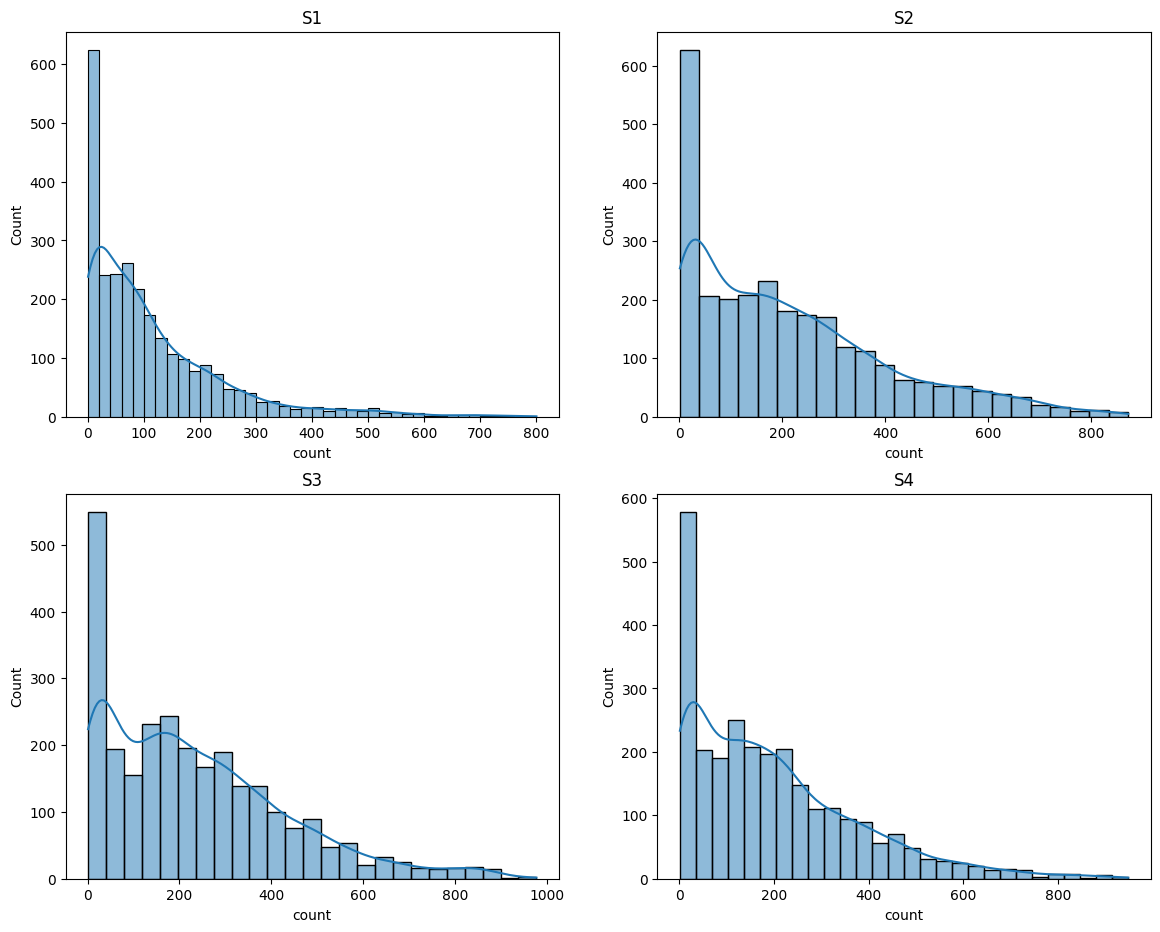

In [ ]:
plt.figure(figsize=(14,11))
plt.subplot(221)
sns.histplot(s1,kde=True)
plt.title("S1")
plt.subplot(222)
sns.histplot(s2,kde=True)
plt.title("S2")
plt.subplot(223)
sns.histplot(s3,kde=True)
plt.title("S3")
plt.subplot(224)
sns.histplot(s4,kde=True)
plt.title("S4")
plt.show()

### Checking q-q plot for gaussian distribution check

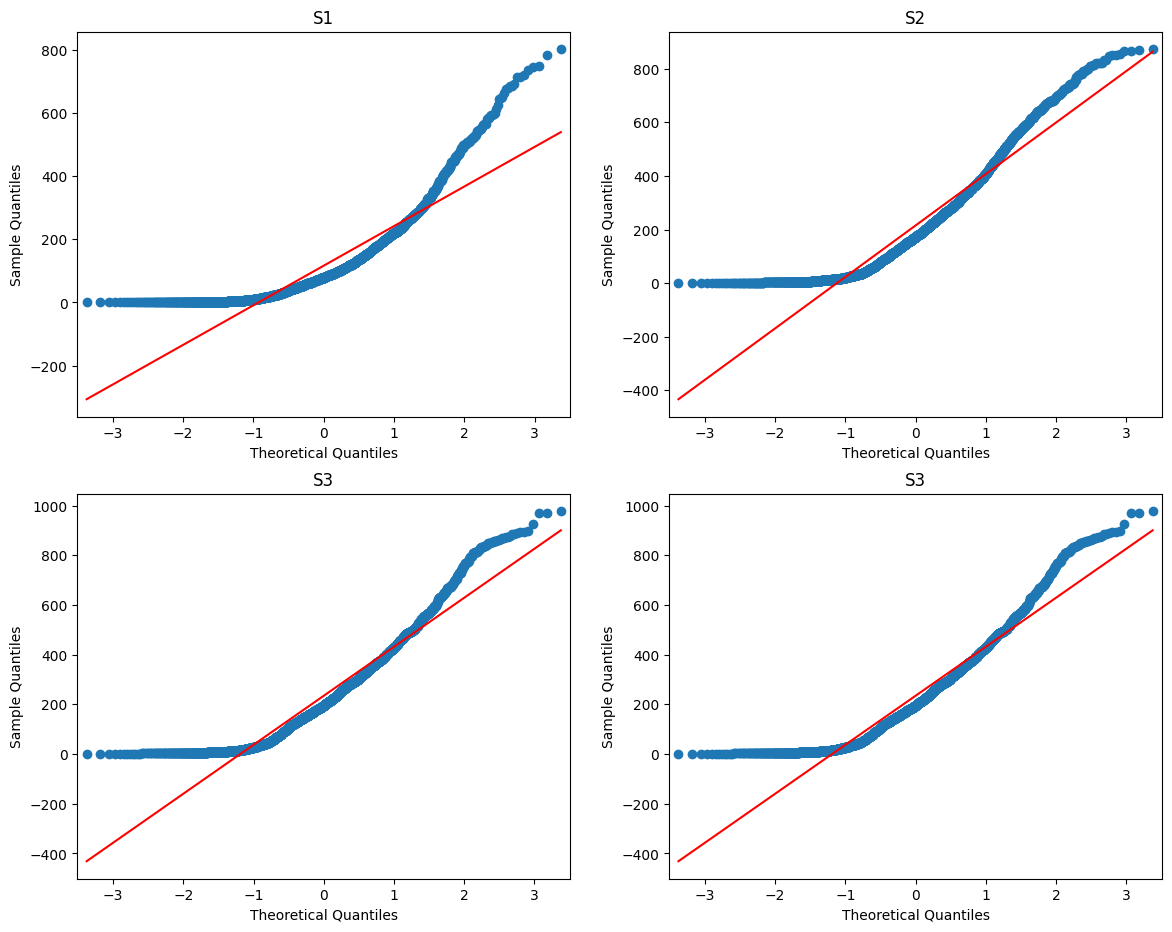

In [ ]:
plt.figure(figsize=(14, 11))

plt.subplot(2, 2, 1)
qqplot(s1, line='s', ax=plt.gca())
plt.title("S1")

plt.subplot(2, 2, 2)
qqplot(s2, line='s', ax=plt.gca())
plt.title("S2")

plt.subplot(2, 2, 3)
qqplot(s3, line='s', ax=plt.gca())
plt.title("S3")

plt.subplot(2, 2, 4)
qqplot(s3, line='s', ax=plt.gca())
plt.title("S3")


plt.show()


## Checking Variance are equal for satisfying assumptions we will do levene test
### **Ho: Variances are same**

### **Ha: variances are different**
### Setting confidence level = 95 percent
### therefore alpha = 0.05

In [ ]:
s_stat, p_value_variance = levene(s1,s2,s3,s4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)
alpha = 0.05
if p_value_variance < alpha:
  print("Reject the null hypothesis")
  print("variances are different")
else:
  print("Fail to reject the null hypothesis")
  print("Variances are same")

s_stats : 187.7706624026276
p_value : 1.0147116860043298e-118
Reject the null hypothesis
variances are different


### since p_value < 0.05 so we reject null hypothesis so variance are different which doesn't satisfy Annova assumptions so we conclude further as given below

### **From above Q-Q plot and Variance test we can say the data doesn't follow Annova Assumption of Gaussian distribution so we have to Use alternative i.e, KRUSKAL Test**

### **Kruskal wallis Test**

### **H0 : mean of bike rented on different season are equal**
### **H1 : mean of bike rented on different season are not equal**

### alpha = 0.05

In [ ]:
s_stats , p_value_weather = kruskal(s1,s2,s3,s4)
print("s_stats : ",s_stats)
print("p_value_weather :", p_value_weather)
if p_value_weather < 0.05:
  print("Reject Null Hypothesis")
  print("mean of bike rented on different season are not equal")
else:
  print("accept Null Hypothesis")
  print("mean of bike rented on different season are equal")

s_stats :  699.6668548181988
p_value_weather : 2.479008372608633e-151
Reject Null Hypothesis
mean of bike rented on different season are not equal


### **From Above result of Hypothesis testing we can say mean of number of bike rented on different season are not equal which concludes that Number of rented bikes are significantly different for different season.**

## **4. Check if the Weather conditions are significantly different during different Seasons?**

### **H0 : weather is independent of season**

### **H1: weather is dependent on season**

### alpha = 0.05

In [ ]:
season_vs_weather = pd.crosstab(df['weather'],df['season'])
season_vs_weather

season,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


In [ ]:
stats, p_value , dof , expected = chi2_contingency(season_vs_weather)
print("stats:",stats)
print("p_value: ",p_value)
print("dof :",dof)
if p_value < 0.05:
  print("Reject the null hypothesis")
  print("weather is dependent on season")
else:
  print("accept the null hypothesis")
  print("weather is independent of season")

stats: 49.15865559689363
p_value:  1.5499250736864862e-07
dof : 9
Reject the null hypothesis
weather is dependent on season


### **from Above result we can conclude that the null hypothesis is rejected and further we can say Weather is dependent on seasons**

# **Summary of Hypothesis Testing and Key Findings:**

1. Effect of Working Day on Electric Cycle Rentals:
   - Test Used: 2-Sample t-test.
   - Result: The p-value (0.226) is greater than the significance level (0.05). Therefore, we fail to reject the null hypothesis.
   - Conclusion: Working days do not have a significant effect on the number of electric cycles rented.

2. Effect of Weather on Bicycle Rentals:
   - Test Used: Kruskal-Wallis test (as ANOVA assumptions were not met).
   - Result: The p-value (3.5e-44) is less than 0.05. Therefore, we reject the null hypothesis.
   - Conclusion: The number of bicycles rented differs significantly across different weather conditions.

3. Effect of Seasons on Bicycle Rentals:
   - Test Used: Kruskal-Wallis test (due to violated ANOVA assumptions).
   - Result: The p-value (2.5e-151) is less than 0.05. Therefore, we reject the null hypothesis.
   - Conclusion: The number of bicycles rented varies significantly across different seasons.

4. Relationship Between Weather and Seasons:
   - Test Used: Chi-Square test for independence.
   - Result: The p-value (1.5e-7) is less than 0.05. Therefore, we reject the null hypothesis.
   - Conclusion: Weather is dependent on seasons.


# **Recommendations Based on Test Results:**

1. Working Days:
    * Since working days do not significantly affect the number of rentals, no specific adjustments or campaigns targeting weekdays versus weekends are necessary. Focus can remain consistent across the week.

2. Weather Conditions:
    * Rentals significantly vary across different weather conditions. Plan for higher availability and maintenance of bicycles during favorable weather (e.g., clear or partly cloudy days) and develop contingency plans for adverse weather conditions (e.g., heavy rain or snow) to ensure customer satisfaction.

3. Seasons:
    * With significant differences in rentals across seasons, allocate more resources (bicycles, staff, promotions) during high-demand seasons and reduce operational costs in low-demand seasons.

4. Weather Dependence on Seasons:
    * As weather is dependent on seasons, seasonal strategies should also consider typical weather patterns. For example:
        * Focus on summer and spring for campaigns highlighting outdoor commuting or recreational usage.
        * During seasons prone to adverse weather, emphasize the availability of covered Yulu zones or incentives for regular users.

